<a href="https://colab.research.google.com/github/prfferreira/CNN/blob/main/Rede_Neural_Feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 6.0 MB 40.7 MB/s 
     |████████████████████████████████| 1.7 MB 39.4 MB/s 
     |████████████████████████████████| 439 kB 57.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
!pip install sklearn numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=72a82aa9c4b0427ad667def5a8f8b1e629c7260b8df1b4c7ad549539fc73c5c4
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [3]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [99]:
print('[INFO] accessing MNIST...')
((TreinoX, TreinoY), (TesteX, TesteY)) = mnist.load_data()

[INFO] accessing MNIST...


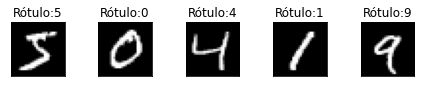

In [93]:
i = 0
for i in range(5):
  plt.subplot(1, 5, i+1)
#  plt.subplot(1, 5, i+1)
  plt.tight_layout()
  plt.imshow(TreinoX[i].reshape(28, 28), cmap='gray')
  plt.title('Rótulo:{}'.format(TreinoY[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [100]:
qtd_treino = 55000
# Separando dados para Validação, Treino (Split)
ValidaX = TreinoX[qtd_treino:][...]
ValidaY = TreinoY[qtd_treino:][...]
# Separando dados para Treino
TreinoX = TreinoX[:qtd_treino,...]
TreinoY = TreinoY[:qtd_treino,...]

# Transformando os dados em bidimensional
TreinoX = TreinoX.reshape((TreinoX.shape[0], 28 * 28 * 1))
ValidaX = ValidaX.reshape((ValidaX.shape[0], 28 * 28 * 1))
TesteX = TesteX.reshape((TesteX.shape[0], 28 * 28 * 1))

# Realizando normalização
TreinoX = TreinoX.astype('float32') / 255.0
ValidaX = ValidaX.astype('float32') / 255.0
TesteX = TesteX.astype('float32') / 255.0

In [101]:
lb = LabelBinarizer()
TreinoY = lb.fit_transform(TreinoY)
ValidaY = lb.transform(ValidaY)
TesteY = lb.transform(TesteY)

In [112]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [113]:
# Utilizando o gradiente de 0,01
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
H = model.fit(TreinoX, TreinoY, validation_data=(TesteX, TesteY),epochs=100, batch_size=128)

Epoch 1/100
430/430 [==============================] - 4s 7ms/step - loss: 2.2746 - accuracy: 0.1860 - val_loss: 2.2377 - val_accuracy: 0.3066
Epoch 2/100
430/430 [==============================] - 3s 7ms/step - loss: 2.2048 - accuracy: 0.3851 - val_loss: 2.1627 - val_accuracy: 0.4258
Epoch 3/100
430/430 [==============================] - 3s 7ms/step - loss: 2.1196 - accuracy: 0.4987 - val_loss: 2.0616 - val_accuracy: 0.5775
Epoch 4/100
430/430 [==============================] - 3s 7ms/step - loss: 2.0006 - accuracy: 0.5684 - val_loss: 1.9170 - val_accuracy: 0.6050
Epoch 5/100
430/430 [==============================] - 3s 7ms/step - loss: 1.8381 - accuracy: 0.6155 - val_loss: 1.7306 - val_accuracy: 0.6492
Epoch 6/100
430/430 [==============================] - 3s 7ms/step - loss: 1.6439 - accuracy: 0.6581 - val_loss: 1.5281 - val_accuracy: 0.6834
Epoch 7/100
430/430 [==============================] - 3s 7ms/step - loss: 1.4494 - accuracy: 0.7007 - val_loss: 1.3417 - val_accuracy: 0.7204

# Com o gradiente de 0,01 e passando a Validação para predição o modelo obteve uma acuracia de 94%

In [114]:
predictions = model.predict(ValidaX, batch_size=128)
print(classification_report(ValidaY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))


40/40 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       489
           1       0.94      0.97      0.95       530
           2       0.94      0.94      0.94       493
           3       0.91      0.92      0.91       509
           4       0.93      0.96      0.94       499
           5       0.90      0.88      0.89       458
           6       0.95      0.97      0.96       482
           7       0.96      0.96      0.96       563
           8       0.93      0.88      0.91       494
           9       0.93      0.92      0.92       483

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



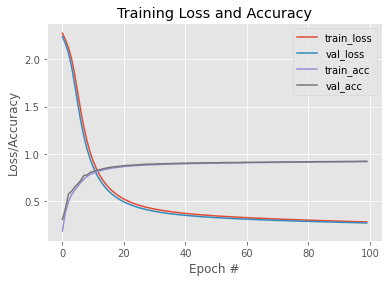

In [115]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

In [116]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [117]:
#Utilizando o gradiente de 0,02
sgd = SGD(0.02)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
H = model.fit(TreinoX, TreinoY, validation_data=(TesteX, TesteY),epochs=100, batch_size=128)

Epoch 1/100
430/430 [==============================] - 4s 7ms/step - loss: 2.2501 - accuracy: 0.2708 - val_loss: 2.1820 - val_accuracy: 0.4713
Epoch 2/100
430/430 [==============================] - 3s 7ms/step - loss: 2.0910 - accuracy: 0.4875 - val_loss: 1.9697 - val_accuracy: 0.5131
Epoch 3/100
430/430 [==============================] - 3s 7ms/step - loss: 1.8061 - accuracy: 0.5951 - val_loss: 1.6072 - val_accuracy: 0.6547
Epoch 4/100
430/430 [==============================] - 3s 7ms/step - loss: 1.4318 - accuracy: 0.6839 - val_loss: 1.2433 - val_accuracy: 0.7180
Epoch 5/100
430/430 [==============================] - 3s 7ms/step - loss: 1.1262 - accuracy: 0.7471 - val_loss: 0.9944 - val_accuracy: 0.7721
Epoch 6/100
430/430 [==============================] - 3s 7ms/step - loss: 0.9276 - accuracy: 0.7842 - val_loss: 0.8351 - val_accuracy: 0.8077
Epoch 7/100
430/430 [==============================] - 3s 7ms/step - loss: 0.7965 - accuracy: 0.8086 - val_loss: 0.7251 - val_accuracy: 0.8256

# Com o gradiente para 0,02 e passando a Validação para predição o modelo obteve uma acuracia de 95%

In [118]:
predictions = model.predict(ValidaX, batch_size=128)
print(classification_report(ValidaY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

40/40 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       489
           1       0.96      0.98      0.97       530
           2       0.97      0.96      0.96       493
           3       0.94      0.93      0.94       509
           4       0.96      0.97      0.96       499
           5       0.94      0.90      0.92       458
           6       0.96      0.99      0.97       482
           7       0.97      0.98      0.97       563
           8       0.93      0.93      0.93       494
           9       0.95      0.93      0.94       483

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



# A precisão aumentou com o número 5 

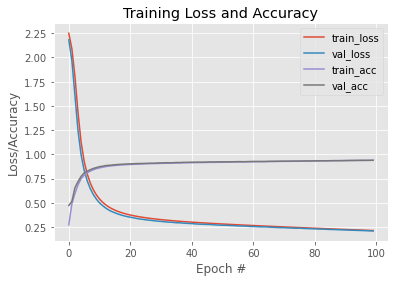

In [119]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()